# ML Algorithms in Mushroom Dataset

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the 
Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). 
Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. 

# Attribute Information:


 * class_ep: edible=e, poisonous=p
 * cap_shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
 * cap_surface: fibrous=f,grooves=g,scaly=y,smooth=s
 * cap_color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
 * bruises: bruises=t,no=f
 * odor:almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
 * gill_attachment: attached=a,descending=d,free=f,notched=n
 * gill_spacing: close=c,crowded=w,distant=d
 * gill_size: broad=b,narrow=n
 * gill_color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
 * stalk_shape: enlarging=e,tapering=t
 * stalk_root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
 * stalk_surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
 * stalk_surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
 * stalk_color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
 * stalk_color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
 * veil_type: partial=p,universal=u
 * veil_color: brown=n,orange=o,white=w,yellow=y
 * ring_number: none=n,one=o,two=t
 * ring_type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
 * spore_print_color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
 * population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
 * habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

## Notebook Summary

#### 1) Loading and Understanding the dataset
#### 2) Exploratory Data Analysis
#### 3) Preparing data
#### 4) Apply ML Algorithms
* Logistic Regression 
* KNN
* RANDOM FOREST
* Decision Tree
* Naive Bayes Classification
#### 5) Conclusion

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1) Loading and Understanding the dataset

In [2]:
data = pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
data.shape

(8124, 23)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [6]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
print(data['class'].unique()) # target feature
print('-'*30)
print(data['class'].value_counts())

['p' 'e']
------------------------------
e    4208
p    3916
Name: class, dtype: int64


### There are two categories, poisonous and edible

In [8]:
# to check the missing value
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

#### No missing values found in this dataset

In [9]:
data.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

veil-type has only one unique value, which means every data in this column is the same. since it doesn't help us 
classify our model, let's just get rid of it.

In [10]:
data = data.drop(['veil-type'],axis=1)

## 1) Exploratory Data Analysis

<AxesSubplot:xlabel='class', ylabel='count'>

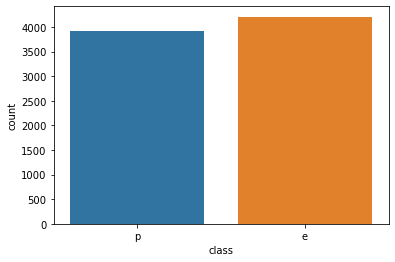

In [11]:
# Distribution of mushroom class
#plt.figure(figsize=(6,6))
sns.countplot('class',data=data)

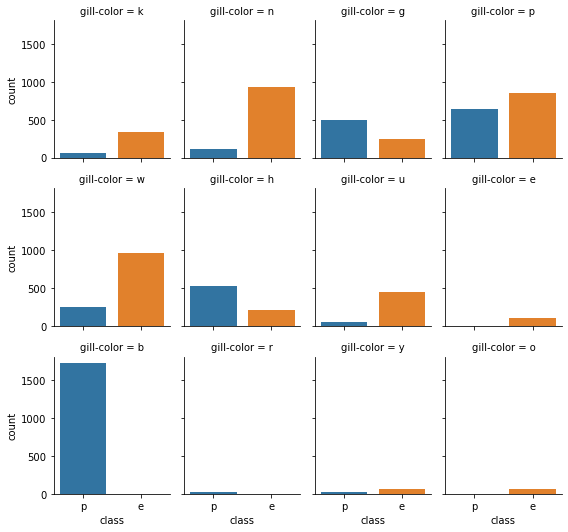

In [12]:
sns.catplot('class',col='gill-color',data=data,kind='count',height=2.5,aspect=.8,col_wrap=4)

### countplots for features stacked with class

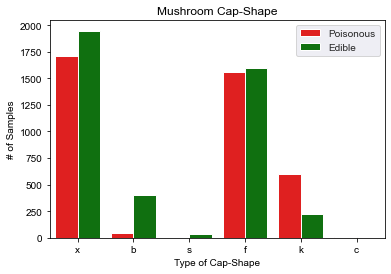

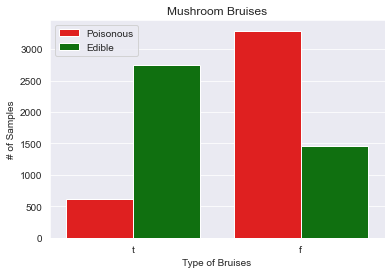

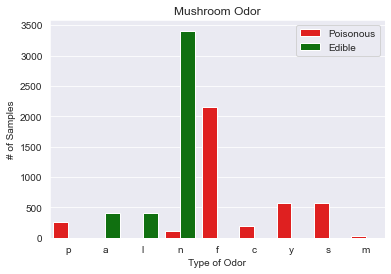

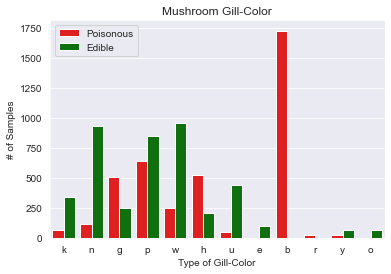

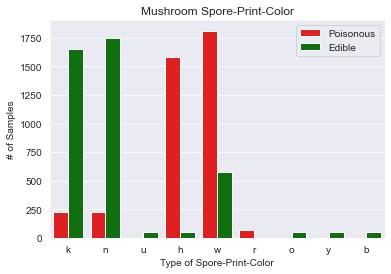

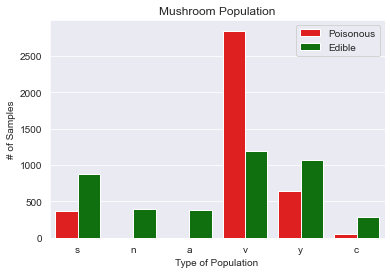

In [13]:
#creating function to create countplots for features stacked with class

def featureclassplot(col):
    fig,ax=plt.subplots()
    sns.set_style('darkgrid')
    sns.countplot(col,hue=data['class'],palette=['red','green'],data=data)
    plt.ylabel('# of Samples')
    plt.xlabel('Type of' + ' ' + col.title())
    plt.title('Mushroom' + ' ' + col.title())
    plt.legend(title=None,labels=['Poisonous','Edible'])
    plt.show()
    
featureclassplot('cap-shape')
featureclassplot('bruises')
featureclassplot('odor')
featureclassplot('gill-color')
featureclassplot('spore-print-color')
featureclassplot('population')


## 3) Preparing data

In [14]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in data.columns:
    if len(data[col].value_counts())==2:
        
        data[col]=labelencoder.fit_transform(data[col])
    
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,1,p,1,0,1,k,...,s,s,w,w,w,o,p,k,s,u
1,0,x,s,y,1,a,1,0,0,k,...,s,s,w,w,w,o,p,n,n,g
2,0,b,s,w,1,l,1,0,0,n,...,s,s,w,w,w,o,p,n,n,m
3,1,x,y,w,1,p,1,0,1,n,...,s,s,w,w,w,o,p,k,s,u
4,0,x,s,g,0,n,1,1,0,k,...,s,s,w,w,w,o,e,n,a,g


In [15]:
data=pd.get_dummies(data)
data.head()

,class,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,1,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,1,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [16]:
cor = data.corr()
rela = cor['class'].sort_values(ascending = False)
rela

class                         1.000000
odor_f                        0.623842
stalk-surface-above-ring_k    0.587658
stalk-surface-below-ring_k    0.573524
gill-size                     0.540024
                                ...   
stalk-surface-below-ring_s   -0.425444
stalk-surface-above-ring_s   -0.491314
bruises                      -0.501530
ring-type_p                  -0.540469
odor_n                       -0.785557
Name: class, Length: 112, dtype: float64

In [17]:
a= []
for i in range(len(rela)):
    if rela[i]>0:
        a.append(rela.index[i])
a

['class',
 'odor_f',
 'stalk-surface-above-ring_k',
 'stalk-surface-below-ring_k',
 'gill-size',
 'gill-color_b',
 'spore-print-color_h',
 'ring-type_l',
 'population_v',
 'spore-print-color_w',
 'habitat_p',
 'stalk-root_?',
 'odor_s',
 'odor_y',
 'stalk-color-below-ring_b',
 'stalk-color-above-ring_b',
 'stalk-color-above-ring_n',
 'stalk-color-above-ring_p',
 'stalk-color-below-ring_p',
 'ring-type_e',
 'stalk-color-below-ring_n',
 'odor_p',
 'ring-number_o',
 'cap-shape_k',
 'odor_c',
 'habitat_l',
 'gill-color_h',
 'veil-color_w',
 'gill-attachment',
 'gill-color_g',
 'cap-color_y',
 'habitat_u',
 'spore-print-color_r',
 'cap-color_e',
 'cap-surface_s',
 'cap-surface_y',
 'stalk-color-below-ring_c',
 'odor_m',
 'ring-type_n',
 'stalk-color-above-ring_c',
 'ring-number_n',
 'cap-color_b',
 'gill-color_r',
 'stalk-color-below-ring_y',
 'cap-color_p',
 'stalk-color-above-ring_y',
 'veil-color_y',
 'cap-shape_c',
 'cap-surface_g',
 'cap-shape_f',
 'stalk-root_b']

In [18]:
# Splitting the features
X = data[a]
X = X.drop('class', axis = 1)
y = data['class']

In [19]:
X.shape

(8124, 50)

## Stratified Train Test Split

When training the machine learning model, it is advisable to use the data with the balanced output class to
avoid problems like overfitting or underfitting. This is done only for the classification machine learning problems.
we can do a stratified train test split of the dataset using the train_test_split() method by passing the parameter stratify=y parameter.

In [20]:
from sklearn.model_selection import train_test_split

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1, stratify=y)


## 4) Apply ML Algorithms

## 1)Logistic Regression 

In [21]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression(max_iter = 10000)
logit_model.fit(X_train,y_train)
y_pred = logit_model.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [23]:
print('Accuracy is: {}%'.format(round(accuracy_score(y_test,y_pred)*100,2)))
print('-'*40)
print('precision is: {}%'.format(round(precision_score(y_test,y_pred)*100,2)))
print('-'*40)
print('Recallscore is: {}%'.format(round(recall_score(y_test,y_pred)*100,2)))
print('-'*40)
print('f1_score: {}%'.format(round(f1_score(y_test,y_pred)*100,2)))

Accuracy is: 99.66%
----------------------------------------
precision is: 100.0%
----------------------------------------
Recallscore is: 99.28%
----------------------------------------
f1_score: 99.64%


#### Confusion Matrix

Text(0.5, 16.0, 'Predicted Labels')

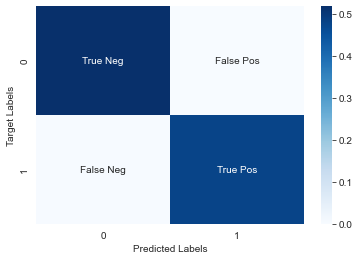

In [24]:
cf_matrix = confusion_matrix(y_test,y_pred)
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
fig, ax = plt.subplots(1, 1)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=labels, fmt='',cmap='Blues')
ax.set_ylabel('Target Labels')    
ax.set_xlabel('Predicted Labels')

In [25]:
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames= ['Predictions'])

Predictions,0,1
Actual,,
0,2104,0
1,14,1944


## 2) KNN

In [26]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
acc_val=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    acc_val.append(acc)

Text(0, 0.5, 'accuracy')

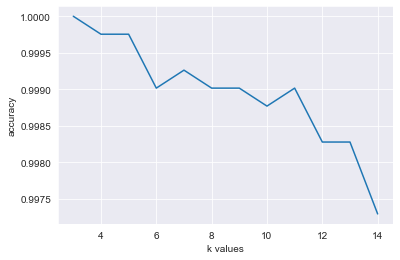

In [27]:
plt.plot(neighbors,acc_val)
plt.xlabel('k values')
plt.ylabel("accuracy")

In [28]:
#finding best k
best_k = neighbors[acc_val.index(max(acc_val))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 3.


In [29]:
classifier=KNeighborsClassifier(n_neighbors=3,metric='minkowski')
classifier.fit(X_train,y_train)
y_predknn=classifier.predict(X_test)

In [30]:
print('Accuracy is: {}%'.format(round(accuracy_score(y_test,y_predknn)*100,2)))
print('-'*40)
print('precision is: {}%'.format(round(precision_score(y_test,y_predknn)*100,2)))
print('-'*40)
print('Recallscore is: {}%'.format(round(recall_score(y_test,y_predknn)*100,2)))
print('-'*40)
print('f1_score: {}%'.format(round(f1_score(y_test,y_predknn)*100,2)))

Accuracy is: 100.0%
----------------------------------------
precision is: 100.0%
----------------------------------------
Recallscore is: 100.0%
----------------------------------------
f1_score: 100.0%


#### Confusion Matrix

Text(0.5, 16.0, 'Predicted Labels')

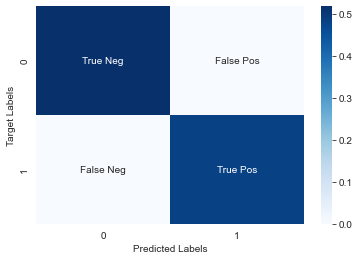

In [31]:
cf_matrix = confusion_matrix(y_test,y_predknn)
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
fig, ax = plt.subplots(1, 1)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=labels, fmt='',cmap='Blues')
ax.set_ylabel('Target Labels')    
ax.set_xlabel('Predicted Labels')

In [32]:
pd.crosstab(y_test, y_predknn, rownames = ['Actual'], colnames= ['Predictions'])

Predictions,0,1
Actual,,
0,2104,0
1,0,1958


### 3)RANDOM FOREST

In [33]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rm=RandomForestClassifier()
rm.fit(X_train,y_train)
ran_y_pred=rm.predict(X_test)

In [34]:
print('Accuracy is: {}%'.format(round(accuracy_score(y_test,ran_y_pred)*100,2)))
print('-'*40)
print('precision is: {}%'.format(round(precision_score(y_test,ran_y_pred)*100,2)))
print('-'*40)
print('Recallscore is: {}%'.format(round(recall_score(y_test,ran_y_pred)*100,2)))
print('-'*40)
print('f1_score: {}%'.format(round(f1_score(y_test,ran_y_pred)*100,2)))

Accuracy is: 100.0%
----------------------------------------
precision is: 100.0%
----------------------------------------
Recallscore is: 100.0%
----------------------------------------
f1_score: 100.0%


In [35]:
cm = confusion_matrix(y_test,ran_y_pred)
cm

array([[2104,    0],
       [   0, 1958]], dtype=int64)

## 4) Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
Dt = DecisionTreeClassifier()
Dt.fit(X_train,y_train)
Dt_y_pred = Dt.predict(X_test)


In [37]:
print('Accuracy is: {}%'.format(round(accuracy_score(y_test,Dt_y_pred)*100,2)))
print('-'*40)
print('precision is: {}%'.format(round(precision_score(y_test,Dt_y_pred)*100,2)))
print('-'*40)
print('Recallscore is: {}%'.format(round(recall_score(y_test,Dt_y_pred)*100,2)))
print('-'*40)
print('f1_score: {}%'.format(round(f1_score(y_test,Dt_y_pred)*100,2)))

Accuracy is: 100.0%
----------------------------------------
precision is: 100.0%
----------------------------------------
Recallscore is: 100.0%
----------------------------------------
f1_score: 100.0%


#### Confusion Matrix

Text(0.5, 16.0, 'Predicted Labels')

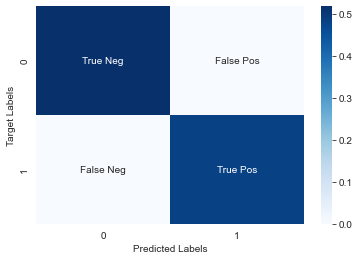

In [38]:
cf_matrix = confusion_matrix(y_test,Dt_y_pred)
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
fig, ax = plt.subplots(1, 1)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=labels, fmt='',cmap='Blues')
ax.set_ylabel('Target Labels')    
ax.set_xlabel('Predicted Labels')

In [39]:
pd.crosstab(y_test, Dt_y_pred, rownames = ['Actual'], colnames= ['Predictions'])

Predictions,0,1
Actual,,
0,2104,0
1,0,1958


## 5) Naive Bayes Classification

In [40]:
from sklearn.naive_bayes import GaussianNB as NB

classifier = NB()
classifier.fit(X_train,y_train)

GaussianNB()

In [41]:
NB_y_pred = classifier.predict(X_test)
NB_y_pred

array([1, 1, 1, ..., 0, 1, 1])

Text(0.5, 16.0, 'Predicted Labels')

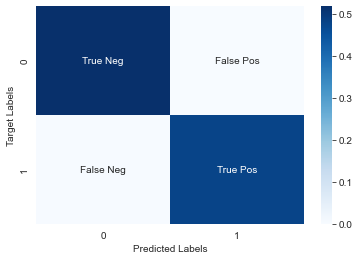

In [42]:
from sklearn.metrics import confusion_matrix,accuracy_score
cf_matrix = confusion_matrix(y_test,NB_y_pred)
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
fig, ax = plt.subplots(1, 1)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=labels, fmt='',cmap='Blues')
ax.set_ylabel('Target Labels')    
ax.set_xlabel('Predicted Labels')

In [43]:
pd.crosstab(y_test, NB_y_pred, rownames = ['Actual'], colnames= ['Predictions'])

Predictions,0,1
Actual,,
0,2104,0
1,14,1944


In [44]:
print('Accuracy is: {}%'.format(round(accuracy_score(y_test,NB_y_pred)*100,2)))
print('-'*40)
print('precision is: {}%'.format(round(precision_score(y_test,NB_y_pred)*100,2)))
print('-'*40)
print('Recallscore is: {}%'.format(round(recall_score(y_test,NB_y_pred)*100,2)))
print('-'*40)
print('f1_score: {}%'.format(round(f1_score(y_test,NB_y_pred)*100,2)))

Accuracy is: 99.66%
----------------------------------------
precision is: 100.0%
----------------------------------------
Recallscore is: 99.28%
----------------------------------------
f1_score: 99.64%


### Fitting Bernoulli Navie Bayes to the Training Set

In [45]:
from sklearn.naive_bayes import  BernoulliNB as NB

classifier = NB()
classifier.fit(X_train,y_train)

BernoulliNB()

In [46]:
NB1_y_pred = classifier.predict(X_test)
NB1_y_pred

array([1, 1, 1, ..., 1, 1, 1])

Text(0.5, 16.0, 'Predicted Labels')

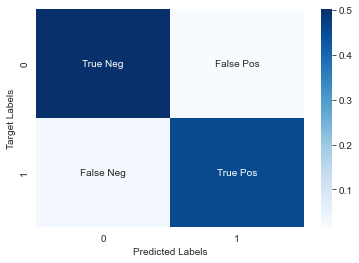

In [47]:
from sklearn.metrics import confusion_matrix,accuracy_score
cf_matrix = confusion_matrix(y_test,NB1_y_pred)
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
fig, ax = plt.subplots(1, 1)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=labels, fmt='',cmap='Blues')
ax.set_ylabel('Target Labels')    
ax.set_xlabel('Predicted Labels')

In [48]:
pd.crosstab(y_test, NB1_y_pred, rownames = ['Actual'], colnames= ['Predictions'])

Predictions,0,1
Actual,,
0,2036,68
1,109,1849


In [49]:
print('Accuracy is: {}%'.format(round(accuracy_score(y_test,NB1_y_pred)*100,2)))
print('-'*40)
print('precision is: {}%'.format(round(precision_score(y_test,NB1_y_pred)*100,2)))
print('-'*40)
print('Recallscore is: {}%'.format(round(recall_score(y_test,NB1_y_pred)*100,2)))
print('-'*40)
print('f1_score: {}%'.format(round(f1_score(y_test,NB1_y_pred)*100,2)))

Accuracy is: 95.64%
----------------------------------------
precision is: 96.45%
----------------------------------------
Recallscore is: 94.43%
----------------------------------------
f1_score: 95.43%


In [50]:
preds = rm.predict(X_test)
print(preds[:36])
print(y_test[:36].values)

[1 1 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1]
[1 1 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1]


Predicting some of the X_test results and matching it with true i.e. y_test values using Random forest Classifier. 
predicted and the true values match 100%.

## 5) Conclusion

#### Most of the classification methods hit 100% accuracy with this dataset.
#### In the case of Naive Bayes Classification,
#### 1) Gaussian naïve Bayes : 99% accuracy
#### 2) Bernoulli naive Bayes : 95% accuracy